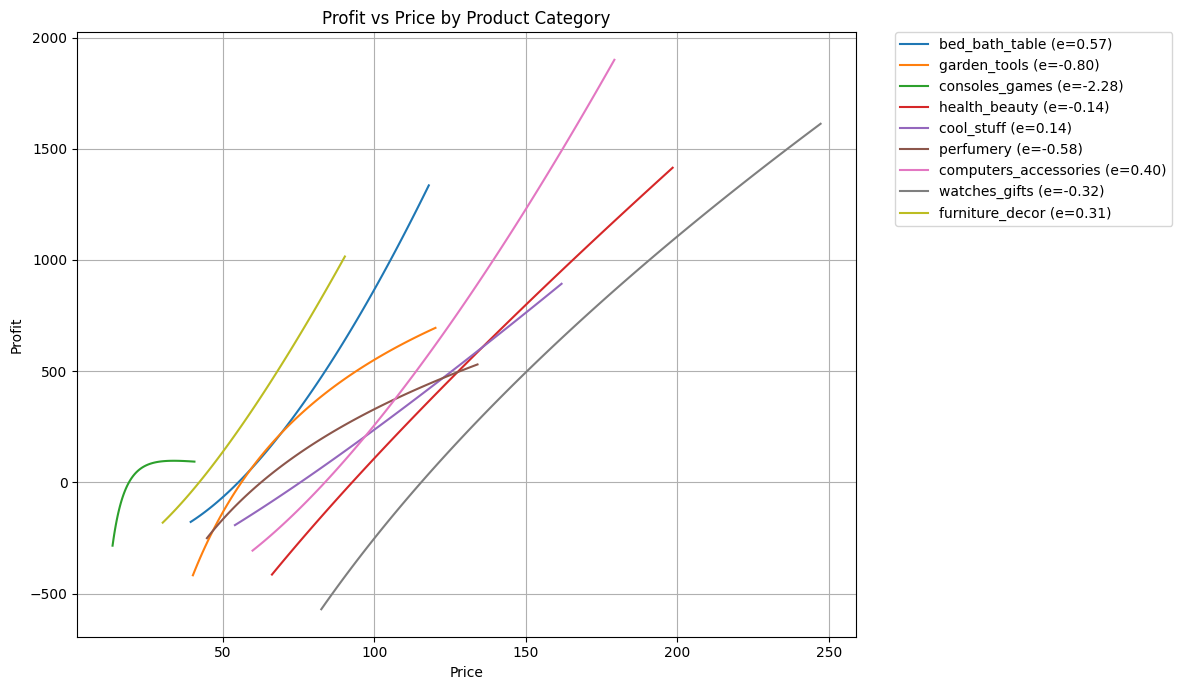

In [1]:
# 📊 Retail Price Optimization - Final Script

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load and clean data
df = pd.read_csv('/content/sample_data/retail_price.csv')  # Make sure this file is in your current folder
df = df.dropna(subset=['unit_price', 'qty'])  # Remove missing values
df['log_price'] = np.log(df['unit_price'])
df['log_qty'] = np.log(df['qty'])

# Plot profit vs price for each category
plt.figure(figsize=(12, 7))
for category in df['product_category_name'].unique():
    cat_df = df[df['product_category_name'] == category]
    if len(cat_df) < 5:
        continue  # Skip if not enough data

    # Estimate price elasticity using log-log regression
    X = sm.add_constant(cat_df['log_price'])
    model = sm.OLS(cat_df['log_qty'], X).fit()
    elasticity = model.params['log_price']

    # Base values
    base_price = cat_df['unit_price'].mean()
    base_qty = cat_df['qty'].mean()
    base_cost = base_price * 0.7  # Assume 30% profit margin

    # Simulate different prices
    price_range = np.linspace(0.5 * base_price, 1.5 * base_price, 100)
    demand = base_qty * (price_range / base_price) ** elasticity
    profit = (price_range - base_cost) * demand

    # Plot curve
    plt.plot(price_range, profit, label=f"{category} (e={elasticity:.2f})")

# Final plot touches
plt.title('Profit vs Price by Product Category')
plt.xlabel('Price')
plt.ylabel('Profit')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()
